In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from keras.layers.core import Dense, Activation
import pandas
import keras

/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/akhilp

In [21]:

df = pandas.read_csv('dataset.csv')

/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
df[0:5]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058824,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [23]:
df = df.dropna()
assert pd.isnull(df).sum().sum() == 0 
assert pd.isna(df).sum().sum() == 0

df = df.replace(['Infinity'], np.nan)
#Replace NaN and infinity values 
df['Flow Bytes/s'] = df['Flow Bytes/s'].replace(np.nan, 0)
df.replace(np.nan, 0, inplace=True)



In [24]:
df.groupby(' Label')[' Label'].count()

 Label
BENIGN              439972
DoS GoldenEye        10293
DoS Hulk            230124
DoS Slowhttptest      5499
DoS slowloris         5796
Heartbleed              11
Name:  Label, dtype: int64

In [25]:
df[' Label'] = df[' Label'].replace('DoS Hulk', 'DoS', regex=True)
df[' Label'] = df[' Label'].replace('BENIGN', 'Normal', regex=True)

In [26]:
#split into features and outcomes

x = df.drop([' Label'], axis = 1 )
y = df[[' Label']]

In [27]:

# Get column names first
names = x.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(x)
new_scaled_df = pd.DataFrame(scaled_df, columns=names)

x = pd.DataFrame(new_scaled_df)

x[0:5]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.356682,-0.654540,-0.011458,-0.009370,-0.089152,-0.007587,-0.377296,-0.176978,-0.346413,-0.366895,...,-0.008566,-1.067955,-0.131743,-0.10047,-0.148781,-0.104443,-0.580544,-0.105764,-0.585813,-0.571332
1,-0.337043,-0.655424,0.001916,-0.005309,-0.062240,-0.007444,-0.256461,-0.294389,-0.285323,-0.227904,...,-0.002976,0.829656,-0.131743,-0.10047,-0.148781,-0.104443,-0.580544,-0.105764,-0.585813,-0.571332
2,-0.356174,-0.655409,0.000579,-0.004294,0.420566,-0.006185,2.219847,-0.294389,1.612488,2.428730,...,-0.004374,0.829656,-0.131743,-0.10047,-0.148781,-0.104443,-0.580544,-0.105764,-0.585813,-0.571332
3,-0.337043,-0.655079,0.009940,0.001798,0.469527,-0.004620,1.786162,-0.294389,0.902838,1.514846,...,0.005407,0.829656,-0.131743,-0.10047,-0.148781,-0.104443,-0.580544,-0.105764,-0.585813,-0.571332
4,-0.356174,-0.655409,-0.000759,-0.004294,0.420566,-0.006184,2.219847,-0.294389,1.834370,2.702511,...,-0.005771,0.829656,-0.131743,-0.10047,-0.148781,-0.104443,-0.580544,-0.105764,-0.585813,-0.571332


In [28]:
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_new = selector.fit_transform(x,y)
X_new.shape

/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [31 32 33 49 56 57 58 59 60 61] are constant.
  UserWarning)


(691695, 8)

In [29]:

colNames=list(x)


In [30]:
true=selector.get_support()
newcolindex=[i for i, x in enumerate(true) if x]
newcolname=list( colNames[i] for i in newcolindex )
newcolname

['Bwd Packet Length Max',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' Fwd IAT Std',
 ' Packet Length Std',
 ' Avg Bwd Segment Size',
 'Idle Mean',
 ' Idle Max']

In [31]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_new, y)
print ("DoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname)))

/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DoS Features sorted by their rank:
[(1, ' Bwd Packet Length Std'), (2, ' Avg Bwd Segment Size'), (3, ' Fwd IAT Std'), (4, ' Packet Length Std'), (5, ' Idle Max'), (6, 'Idle Mean'), (7, ' Bwd Packet Length Mean'), (8, 'Bwd Packet Length Max')]


In [32]:
x = X_new
    
x

array([[-0.63400842, -0.68535799, -0.60042215, ..., -0.68535799,
        -0.58054444, -0.58581283],
       [-0.57397147, -0.61114939, -0.51915279, ..., -0.61114939,
        -0.58054444, -0.58581283],
       [-0.03402132, -0.03477924,  0.13993883, ..., -0.03477924,
        -0.58054444, -0.58581283],
       ...,
       [-0.63400842, -0.68535799, -0.60042215, ..., -0.68535799,
        -0.58054444, -0.58581283],
       [-0.5873555 , -0.53242811, -0.60042215, ..., -0.53242811,
        -0.58054444, -0.58581283],
       [-0.59309152, -0.55123096, -0.60042215, ..., -0.55123096,
        -0.58054444, -0.58581283]])

In [33]:
df.groupby(' Label')[' Label'].count()

 Label
DoS                 230124
DoS GoldenEye        10293
DoS Slowhttptest      5499
DoS slowloris         5796
Heartbleed              11
Normal              439972
Name:  Label, dtype: int64

In [34]:
# take label column
labeldf=df[' Label']
# change the label column
newlabeldf=labeldf.replace({ 'Normal' : 0, 'DoS' : 1 ,'DoS GoldenEye': 2, 'DoS Slowhttptest': 2, 'DoS slowloris': 2, 'Heartbleed': 2
                           })

df[' Label'] = newlabeldf
print(df[' Label'].head())




0    0
1    0
2    0
3    0
4    0
Name:  Label, dtype: int64


In [35]:
label_df=df[' Label']
newlabel_df=label_df.replace({ 0 : 'Normal', 1 : 'DoS' , 2 : 'OtherAttacks'})

df[' Label'] = newlabel_df
print(df[' Label'].head())

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name:  Label, dtype: object


In [36]:
df.groupby(' Label')[' Label'].count()

 Label
DoS             230124
Normal          439972
OtherAttacks     21599
Name:  Label, dtype: int64

In [37]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [38]:
finalDf = pd.concat([principalDf, df[[' Label']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Label
0,-1.771669,-0.054267,Normal
1,-1.641116,0.041251,Normal
2,-0.509407,0.867687,Normal
3,-0.207317,1.101240,Normal
4,-0.493670,0.878483,Normal


In [39]:
finalDf.groupby(' Label')[' Label'].count()

 Label
DoS             230124
Normal          439972
OtherAttacks     21599
Name:  Label, dtype: int64

In [40]:
pca.explained_variance_ratio_

array([0.8872901 , 0.08919794])

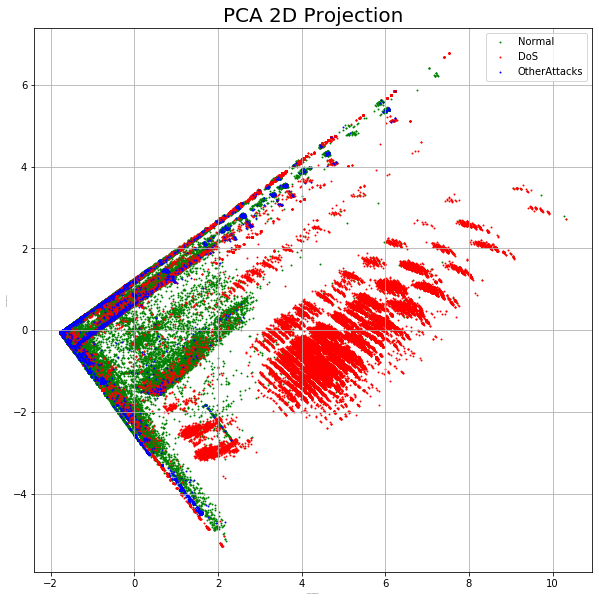

In [42]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 0)
ax.set_ylabel('Principal Component 2', fontsize = 0)
ax.set_title('PCA 2D Projection', fontsize = 20)
targets = ['Normal', 'DoS', 'OtherAttacks']
colors = ['g', 'r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[' Label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 0.9)
ax.legend(targets)
ax.grid()